In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
from sklearn import metrics
from scipy import stats
from datetime import datetime
%matplotlib inline

---

## defining functions to graph metrics

In [2]:
def base_stats(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y_actual[i] != y_hat[i]:
            FP += 1
        if y_actual[i] == y_hat[i] == 0:
            TN += 1
        if y_hat[i] == 0 and y_actual[i] != y_hat[i]:
            FN += 1
    out = [TP, TN, FP, FN]
    return out

In [3]:
def f1(stats):
    precision = stats[0] / (stats[0] + stats[2])
    recall = stats[0] / (stats[0] + stats[3])
    fscore = 2 * (precision * recall) / (precision + recall)
    return fscore

In [4]:
def graph(data, y_actual, y_hat, graph_name, th, f1scor, s=False):
    colorful = ["g", "b", "y", "r"]
    x_axis = ["TP", "TN", "FP", "FN"]
    scale = np.arange(0, sorted(data)[-1] + 5, 5)

    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(10, 5), dpi=120, gridspec_kw={"width_ratios": [1, 3]}
    )
    ax1.bar(x_axis, data, color=colorful, label="F1score:{0:.4f}".format(f1scor))
    for i, v in enumerate(data):
        ax1.text(i - 0.15, v + 0.5, data[i], fontweight="bold")
    ax1.title.set_text("Base stats w/ threshold {}".format(th))
    ax1.legend(loc="lower center")

    fpr, tpr, th = metrics.roc_curve(y_actual, y_hat)
    auc = metrics.roc_auc_score(y_actual, y_hat)
    ax2.plot(fpr, tpr, label="AUC:{0:.4f}".format(auc))
    ax2.set(xlabel="False Positive Rate", ylabel="True Positive Rate")
    ax2.title.set_text("ROC curve & AUC")
    ax2.legend()

    now = str(datetime.now())
    fig.suptitle(graph_name)
    if s == True:
        fig.savefig("{}{}.png".format(graph_name, now))

In [6]:
def calc(path_y_actual, path_y_hat, th, gr, graph_name, save):
#     y_actual = pd.read_csv(path_y_actual).iloc[:, -1]
#     y_hat = pd.read_csv(path_y_hat).iloc[:, -1]
    y_actual = np.load(path_y_actual, allow_pickle=True)
    y_hat = np.load(path_y_hat, allow_pickle=True)

    if len(y_actual) != len(y_hat):
        print("`y_actual` is a different dimension from `y_hat`")
    
    y_actual_th = y_actual > th
    y_hat_th = y_hat > th

    stats = base_stats(y_actual_th, y_hat_th)
    f1score = f1(stats)
    
    if gr == True:
        graph(stats, y_actual, y_hat, graph_name, th, f1score, save)
    print("F1score:{}".format(f1score))

In [7]:
PTH = '/scratch/richardso21/20-21_BGSUB/FgSegNet_clf/'
SITES = ['prudhoe_12','prudhoe_15','prudhoe_22']

---

In [9]:
p12_path = join(PTH, SITES[0])
p12_gTruths = p12_path + '_gTruths.npy'
p12_hat = p12_path + '_outputsRaw.npy'

F1score:0.8125


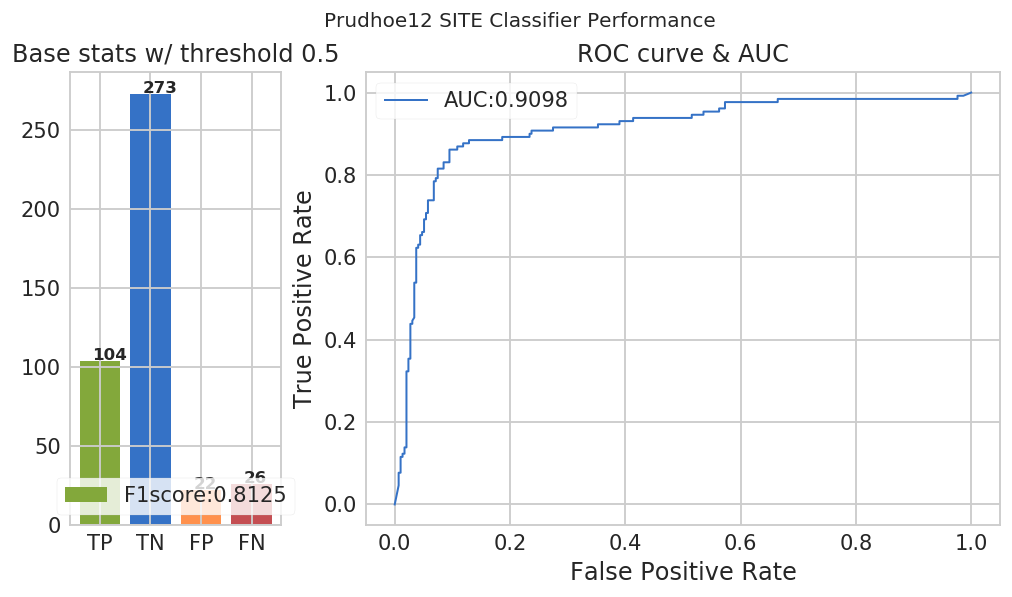

In [20]:
calc(
    p12_gTruths,
    p12_hat,
    0.5,
    gr=True,
    graph_name="Prudhoe12 SITE Classifier Performance",
    save=True
)

In [16]:
p15_path = join(PTH, SITES[1])
p15_gTruths = p15_path + '_gTruths.npy'
p15_hat = p15_path + '_outputsRaw.npy'

F1score:0.4464285714285714


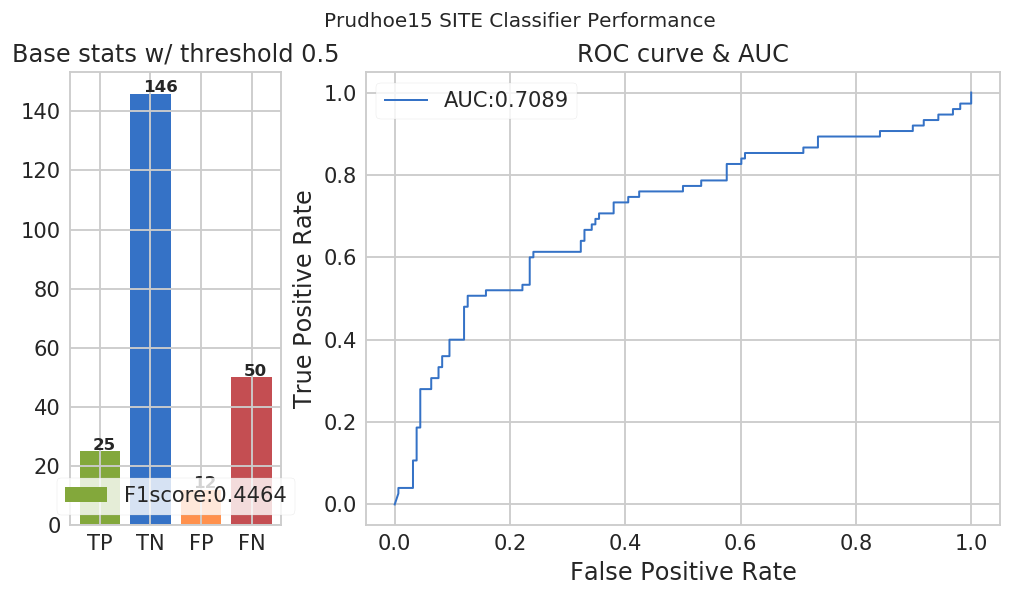

In [21]:
calc(
    p15_gTruths,
    p15_hat,
    0.5,
    gr=True,
    graph_name="Prudhoe15 SITE Classifier Performance",
    save=True
)

In [18]:
p22_path = join(PTH, SITES[2])
p22_gTruths = p22_path + '_gTruths.npy'
p22_hat = p22_path + '_outputsRaw.npy'

F1score:0.6628571428571428


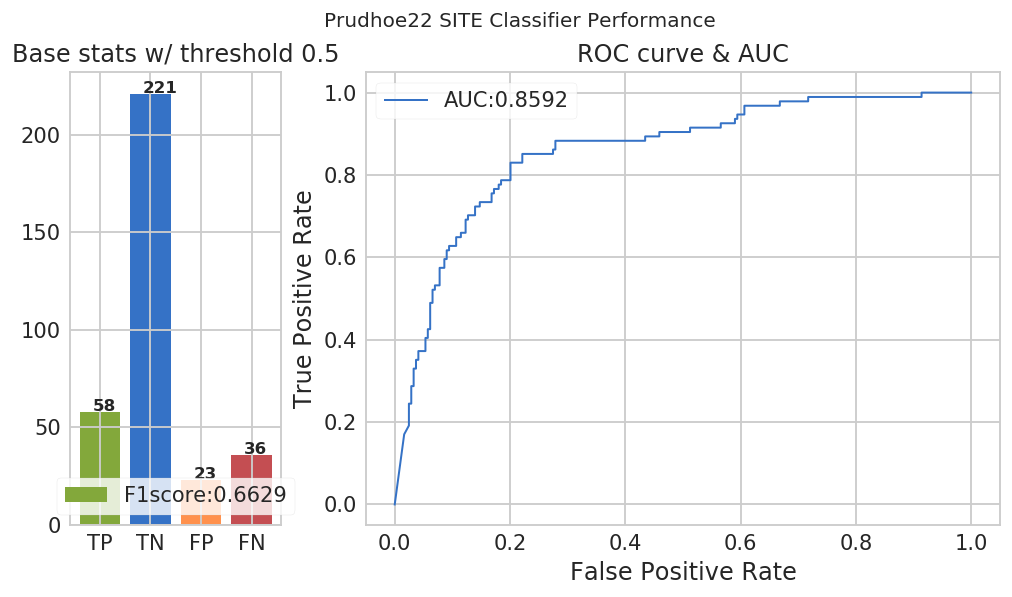

In [22]:
calc(
    p22_gTruths,
    p22_hat,
    0.5,
    gr=True,
    graph_name="Prudhoe22 SITE Classifier Performance",
    save=True
)

---

In [23]:
OPTH = '/scratch/richardso21/20-21_BGSUB/FgSegNet_clf/old'
SITES = ['prudhoe_12','prudhoe_15','prudhoe_22']

---

In [24]:
op12_path = join(OPTH, SITES[0])
op12_gTruths = op12_path + '_gTruths.npy'
op12_hat = op12_path + '_outputsRaw.npy'

F1score:0.8143322475570034


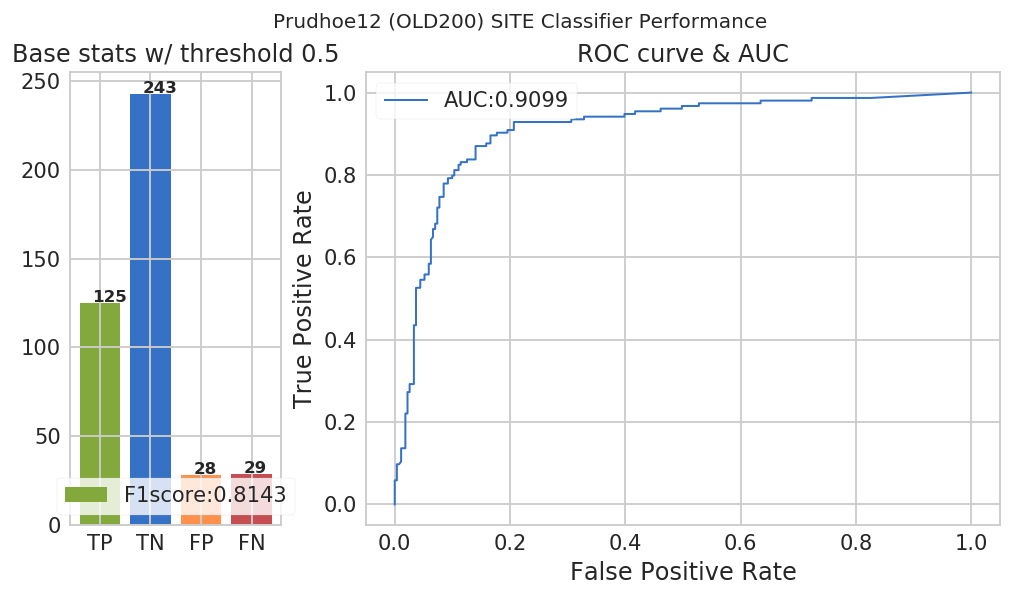

In [34]:
calc(
    op12_gTruths,
    op12_hat,
    0.5,
    gr=True,
    graph_name="Prudhoe12 (OLD200) SITE Classifier Performance",
    save=True
)

In [29]:
op15_path = join(OPTH, SITES[1])
op15_gTruths = op15_path + '_gTruths.npy'
op15_hat = op15_path + '_outputsRaw.npy'

F1score:0.6106870229007634


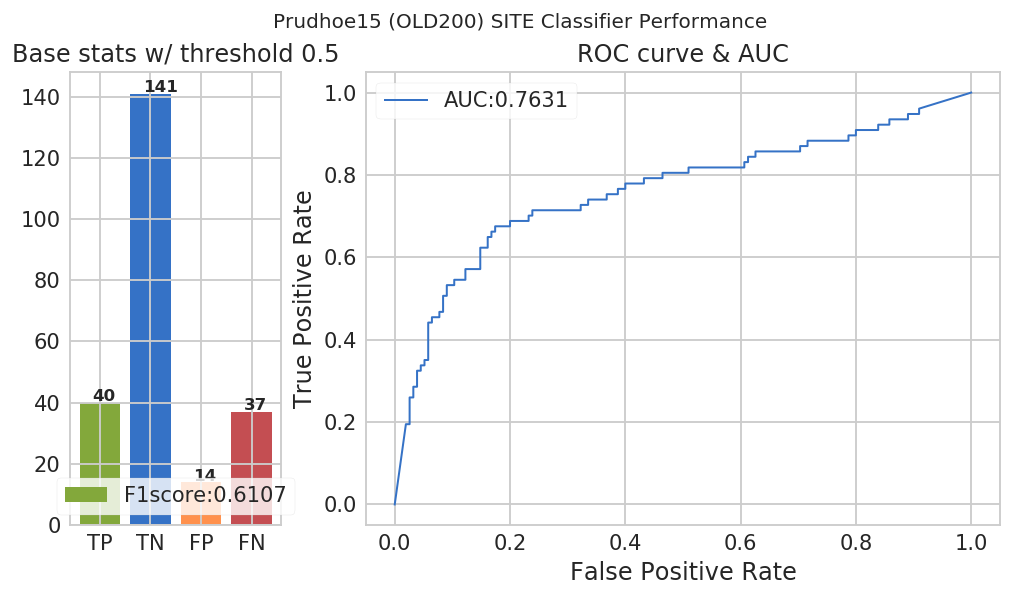

In [35]:
calc(
    op15_gTruths,
    op15_hat,
    0.5,
    gr=True,
    graph_name="Prudhoe15 (OLD200) SITE Classifier Performance",
    save=True
)

In [32]:
op22_path = join(OPTH, SITES[2])
op22_gTruths = op22_path + '_gTruths.npy'
op22_hat = op22_path + '_outputsRaw.npy'

F1score:0.7203791469194312


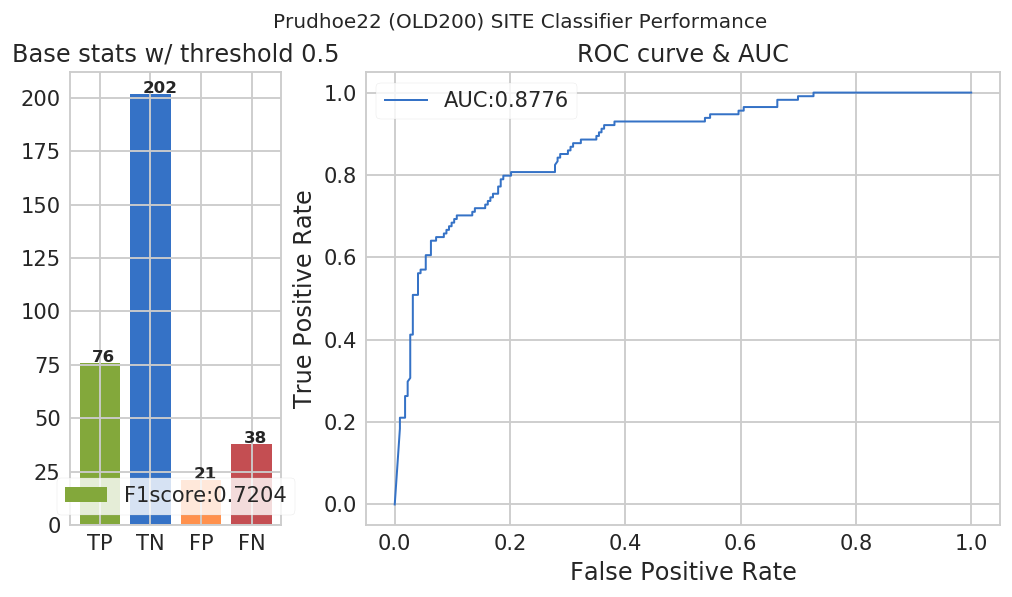

In [36]:
calc(
    op22_gTruths,
    op22_hat,
    0.5,
    gr=True,
    graph_name="Prudhoe22 (OLD200) SITE Classifier Performance",
    save=True
)